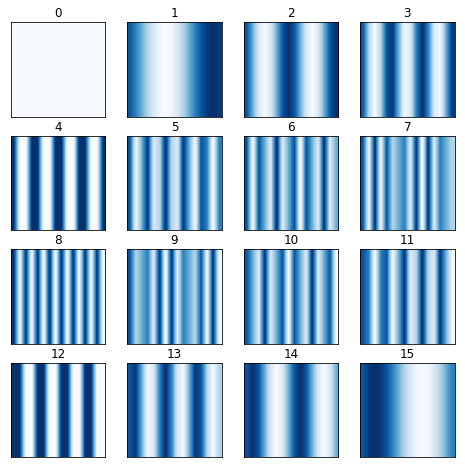

In [2]:
# Visualization of the frequency basis functions of 1-D Fourier Tranform 

import torch 
import matplotlib.pyplot as plt
import numpy as np

def decompose(N):
    sqrt = int(np.sqrt(N))
    for i in range(sqrt, 0, -1):
        if N % i == 0:
            return i, N // i
        
num=16  # data length N
height, width = decompose(num)
fa = torch.zeros(1,num,2)

plt.figure(figsize=(height*2, width*2))
for j in range(num):
    fa[:,j,:] = 1
    a = torch.ifft(fa, 1)[..., 0]
    # bilinear upsampling to make visualization smooth
    a = torch.nn.Upsample((300,300), mode="bilinear")(a.unsqueeze(0).unsqueeze(0)).squeeze(0).squeeze(0)

    img = a.numpy() #torchvision.transforms.ToPILImage()(a)
    plt.subplot(height, width, j+1)
    plt.title("{}".format(j))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="Blues")
#     plt.axis('off')
    fa[:,j,:] = 0

# The figure shows the basis functions of different frequencies.
# The computation of the spetrum of weight consider all elements in the spatial domain,
# and the spetrum replects the density of weight on each frequency.